In [33]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

In [34]:
df = pd.read_csv("iris.data.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,Class_name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [35]:
data = df.iloc[:, :-1].values
target = df.iloc[:, -1].values

In [36]:
classes = np.unique(df.Class_name)
classes

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [37]:
features = df.columns[0:4]
features

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.3)

In [39]:
dtree = DecisionTreeClassifier(criterion="gini")
dtree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [40]:
dtree.score(X_test, Y_test)
Y_pred = dtree.predict(X_test)

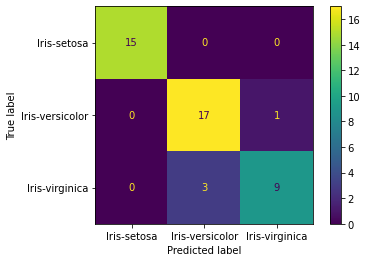

In [41]:
cm = confusion_matrix(Y_test, Y_pred)

dcm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
dcm.plot()

In [42]:
print(classification_report(Y_test, Y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.85      0.94      0.89        18
 Iris-virginica       0.90      0.75      0.82        12

       accuracy                           0.91        45
      macro avg       0.92      0.90      0.90        45
   weighted avg       0.91      0.91      0.91        45



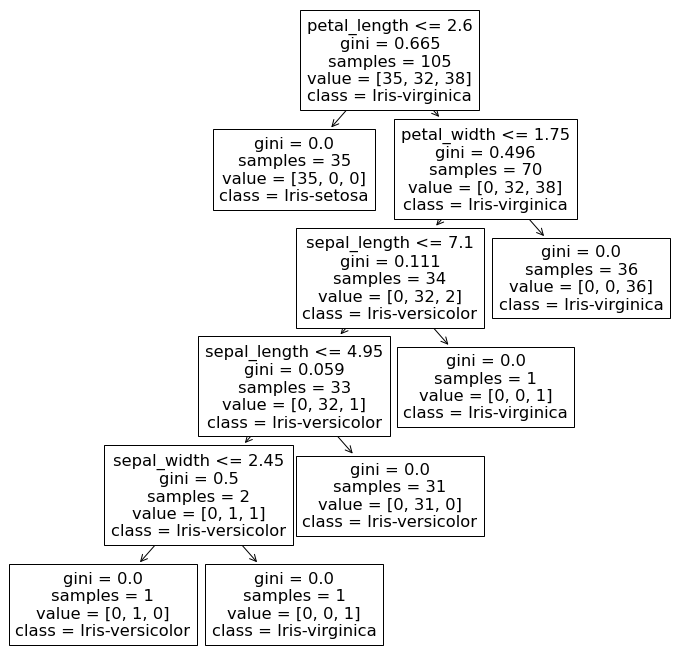

In [45]:
plt.figure(figsize=(12,12))
tree.plot_tree(dtree, class_names=classes, feature_names=features)
plt.show()